# Insurance Claims Analytics - Data Visualization & Insights

**Project**: Multi-Source Insurance Claims Analytics  
**Purpose**: Explore and visualize patterns in harmonized insurance data  
**Data**: 5,086 unified claims from 3 sources

---

## Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


In [ ]:
# Database connection
DB_CONFIG = {
    'dbname': 'insurance_analytics',
    'user': 'addy',  # Update with your username
    'password': 'password123',  # Update with your password
    'host': 'localhost',
    'port': '5432'
}

# Load data from DBT mart
query = """
SELECT * 
FROM insurance_staging_analytics.fct_claims
WHERE total_claim_amount > 0
"""

try:
    conn = psycopg.connect(**DB_CONFIG)
    df = pd.read_sql_query(query, conn)
    conn.close()
    print(f"✓ Loaded {len(df):,} claims")
    print(f"✓ {len(df.columns)} columns")
except Exception as e:
    print(f"✗ Error: {e}")
    print("Note: Update DB_CONFIG with your credentials")

✓ Loaded 5,086 claims
✓ 65 columns


In [3]:
# Quick data overview
print("Dataset Shape:", df.shape)
print("\nData Sources:")
print(df['source_system'].value_counts())
print("\nSample Data:")
df.head()

Dataset Shape: (5086, 65)

Data Sources:
source_system
customer_c    2746
customer_b    1340
customer_a    1000
Name: count, dtype: int64

Sample Data:


,claim_id,source_system,source_policy_number,source_claim_number,policy_effective_date,policy_state,policy_annual_premium,policy_deductible,coverage_limit_bi,umbrella_limit,months_as_customer,age,age_group,gender,marital_status,education_level,occupation,income_annual,home_value,zip_code,urbanicity,vehicle_year,vehicle_make,vehicle_model,vehicle_age,vehicle_age_category,vehicle_type,vehicle_value,is_red_car,incident_date,incident_year,incident_month,incident_day_of_week,incident_is_weekend,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour,time_of_day,vehicles_involved,bodily_injuries_count,witnesses_count,police_report_available,authorities_contacted,attorney_involved,seatbelt_used,property_damage,total_claim_amount,injury_claim_amount,property_claim_amount,vehicle_claim_amount,claim_severity_category,prior_claim_count,prior_claim_total_amount,prior_claims_category,mvr_points,license_revoked,driving_record_category,fraud_reported,claim_to_premium_ratio,data_quality_score,load_timestamp,created_at
0,customer_a_521585,customer_a,521585,521585,2014-10-17,OH,1406.91,1000.00,250000.00,0.00,328.00,48.00,45-54,MALE,Married,MD,craft-repair,NaN,NaN,466132,None,2004.00,Saab,92x,21.00,Very Old (11+),None,NaN,None,2015-01-25,2015.00,1.00,0.00,True,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5.00,Night,1.00,1.00,2.00,True,Police,None,None,True,71610.00,6510.00,13020.00,52080.00,Severe,NaN,NaN,Many (4+),NaN,None,Major Issues,True,50.90,100,2025-11-26 20:25:08.951178,2025-11-27 04:56:41.909952+00:00
1,customer_a_342868,customer_a,342868,342868,2006-06-27,IN,1197.22,2000.00,250000.00,5000000.00,228.00,42.00,35-44,MALE,Single,MD,machine-op-inspct,NaN,NaN,468176,None,2007.00,Mercedes,E400,18.00,Very Old (11+),None,NaN,None,2015-01-21,2015.00,1.00,3.00,False,Vehicle Theft,?,Minor Damage,VA,Riverwood,8.00,Morning,1.00,0.00,0.00,False,Police,None,None,False,5070.00,780.00,780.00,3510.00,Moderate,NaN,NaN,Many (4+),NaN,None,Major Issues,True,4.23,100,2025-11-26 20:25:08.954247,2025-11-27 04:56:41.909952+00:00
2,customer_a_687698,customer_a,687698,687698,2000-09-06,OH,1413.14,2000.00,100000.00,5000000.00,134.00,29.00,25-34,FEMALE,Single,PhD,sales,NaN,NaN,430632,None,2007.00,Dodge,RAM,18.00,Very Old (11+),None,NaN,None,2015-02-22,2015.00,2.00,0.00,True,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7.00,Morning,3.00,2.00,3.00,False,Police,None,None,False,34650.00,7700.00,3850.00,23100.00,Significant,NaN,NaN,Many (4+),NaN,None,Major Issues,False,24.52,100,2025-11-26 20:25:08.954649,2025-11-27 04:56:41.909952+00:00
3,customer_a_227811,customer_a,227811,227811,1990-05-25,IL,1415.74,2000.00,250000.00,6000000.00,256.00,41.00,35-44,FEMALE,Single,PhD,armed-forces,NaN,NaN,608117,None,2014.00,Chevrolet,Tahoe,11.00,Very Old (11+),None,NaN,None,2015-01-10,2015.00,1.00,6.00,True,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5.00,Night,1.00,1.00,2.00,False,Police,None,None,False,63400.00,6340.00,6340.00,50720.00,Severe,NaN,NaN,Many (4+),NaN,None,Major Issues,True,44.78,100,2025-11-26 20:25:08.955043,2025-11-27 04:56:41.909952+00:00
4,customer_a_367455,customer_a,367455,367455,2014-06-06,IL,1583.91,1000.00,500000.00,6000000.00,228.00,44.00,35-44,MALE,Single,Associate,sales,NaN,NaN,610706,None,2009.00,Accura,RSX,16.00,Very Old (11+),None,NaN,None,2015-02-17,2015.00,2.00,2.00,False,Vehicle Theft,?,Minor Damage,NY,Arlington,20.00,Evening,1.00,0.00,1.00,False,NaN,None,None,False,6500.00,1300.00,650.00,4550.00,Moderate,NaN,NaN,Many (4+),NaN,None,Major Issues,False,4.10,100,2025-11-26 20:25:08.955410,2025-11-27 04:56:41.909952+00:00


## 1. Claims Distribution Analysis

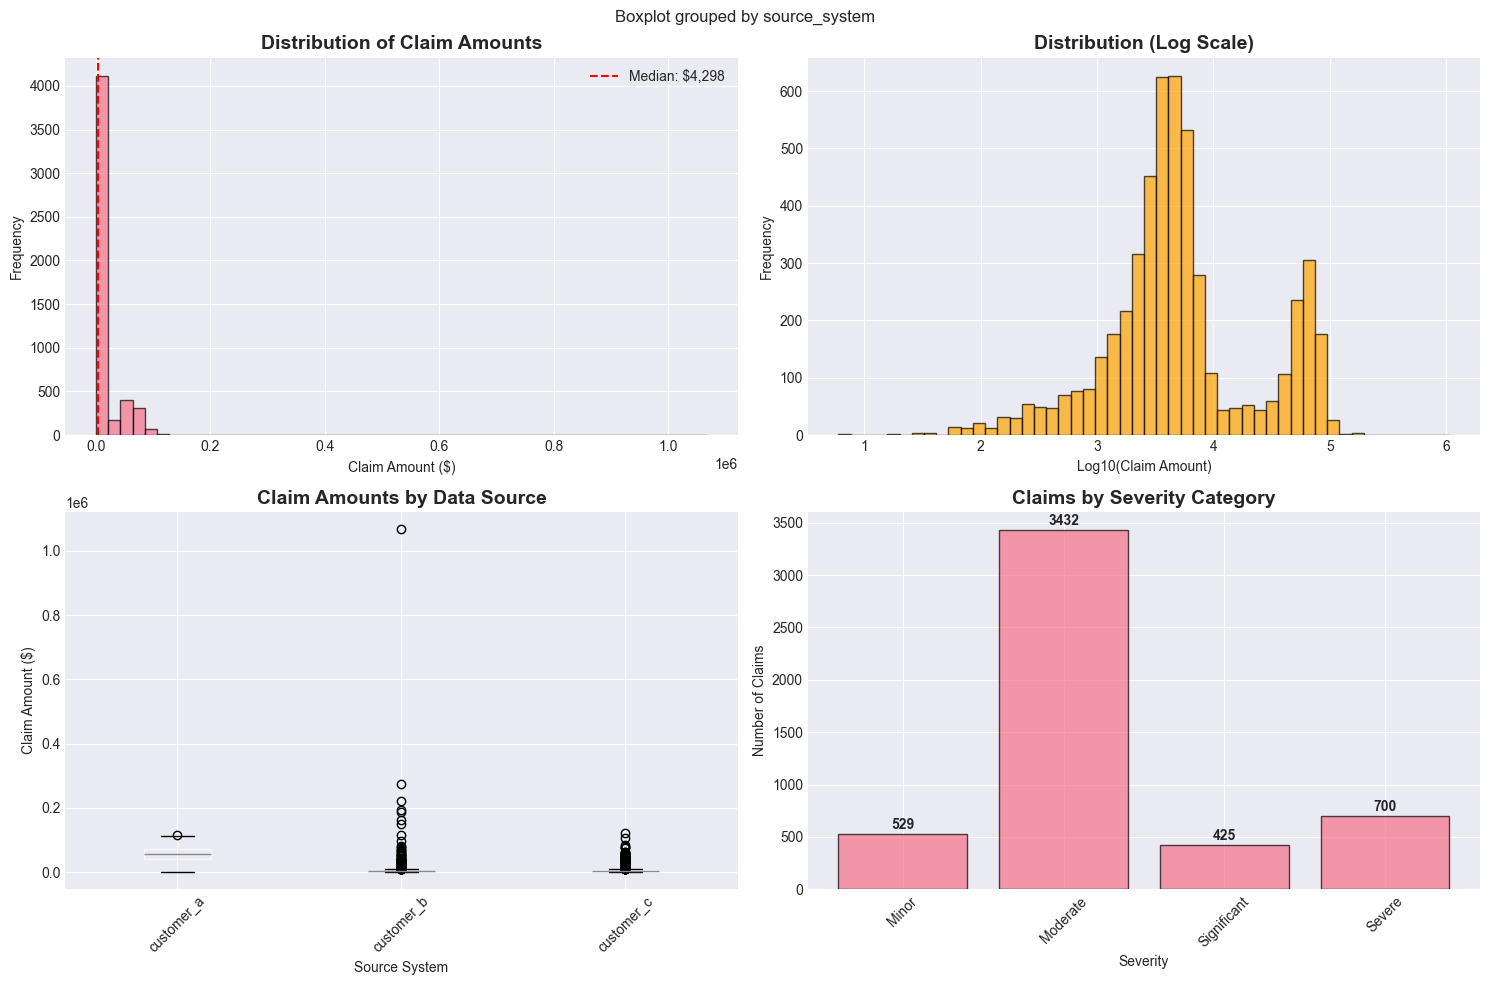


📊 Key Statistics:
Average Claim: $15,003.67
Median Claim: $4,298.00
Max Claim: $1,067,697.00
Total Claims Value: $76,308,645.00


In [4]:
# Claim amount distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Overall distribution
axes[0, 0].hist(df['total_claim_amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Claim Amounts', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Claim Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['total_claim_amount'].median(), color='red', 
                    linestyle='--', label=f'Median: ${df["total_claim_amount"].median():,.0f}')
axes[0, 0].legend()

# 2. Log scale distribution
axes[0, 1].hist(np.log10(df['total_claim_amount'] + 1), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log10(Claim Amount)')
axes[0, 1].set_ylabel('Frequency')

# 3. By source system
df.boxplot(column='total_claim_amount', by='source_system', ax=axes[1, 0])
axes[1, 0].set_title('Claim Amounts by Data Source', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Source System')
axes[1, 0].set_ylabel('Claim Amount ($)')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# 4. By severity category
severity_order = ['Minor', 'Moderate', 'Significant', 'Severe']
severity_counts = df['claim_severity_category'].value_counts().reindex(severity_order)
axes[1, 1].bar(severity_counts.index, severity_counts.values, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Claims by Severity Category', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Severity')
axes[1, 1].set_ylabel('Number of Claims')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(severity_counts.values):
    axes[1, 1].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('claim_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Statistics:")
print(f"Average Claim: ${df['total_claim_amount'].mean():,.2f}")
print(f"Median Claim: ${df['total_claim_amount'].median():,.2f}")
print(f"Max Claim: ${df['total_claim_amount'].max():,.2f}")
print(f"Total Claims Value: ${df['total_claim_amount'].sum():,.2f}")

## 2. Demographic Analysis

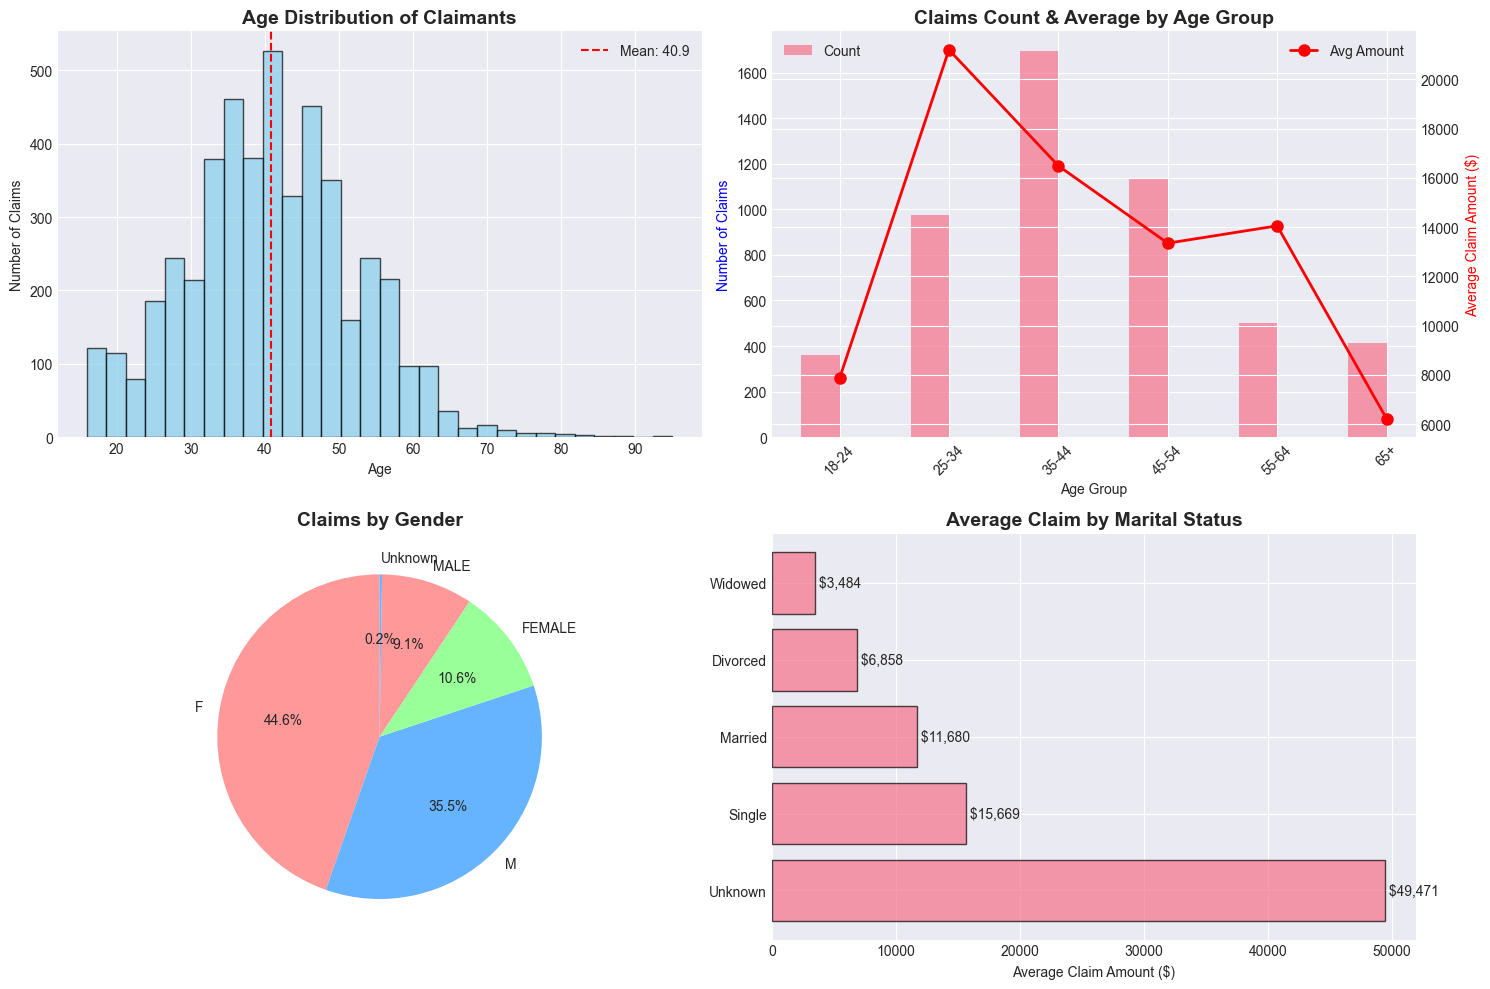

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Age distribution
axes[0, 0].hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution of Claimants', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Number of Claims')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].legend()

# 2. Claims by age group
age_group_claims = df.groupby('age_group')['total_claim_amount'].agg(['count', 'mean'])
age_group_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_group_claims = age_group_claims.reindex(age_group_order)

x = np.arange(len(age_group_claims))
width = 0.35
axes[0, 1].bar(x - width/2, age_group_claims['count'], width, label='Count', alpha=0.7)
ax2 = axes[0, 1].twinx()
ax2.plot(x, age_group_claims['mean'], 'ro-', linewidth=2, markersize=8, label='Avg Amount')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Number of Claims', color='b')
ax2.set_ylabel('Average Claim Amount ($)', color='r')
axes[0, 1].set_title('Claims Count & Average by Age Group', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(age_group_claims.index, rotation=45)
axes[0, 1].legend(loc='upper left')
ax2.legend(loc='upper right')

# 3. Gender distribution
gender_data = df['gender'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[1, 0].pie(gender_data.values, labels=gender_data.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[1, 0].set_title('Claims by Gender', fontsize=14, fontweight='bold')

# 4. Marital status
marital_avg = df.groupby('marital_status')['total_claim_amount'].mean().sort_values(ascending=False)
axes[1, 1].barh(marital_avg.index, marital_avg.values, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Average Claim by Marital Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Claim Amount ($)')
for i, v in enumerate(marital_avg.values):
    axes[1, 1].text(v, i, f' ${v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('demographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Vehicle & Incident Analysis

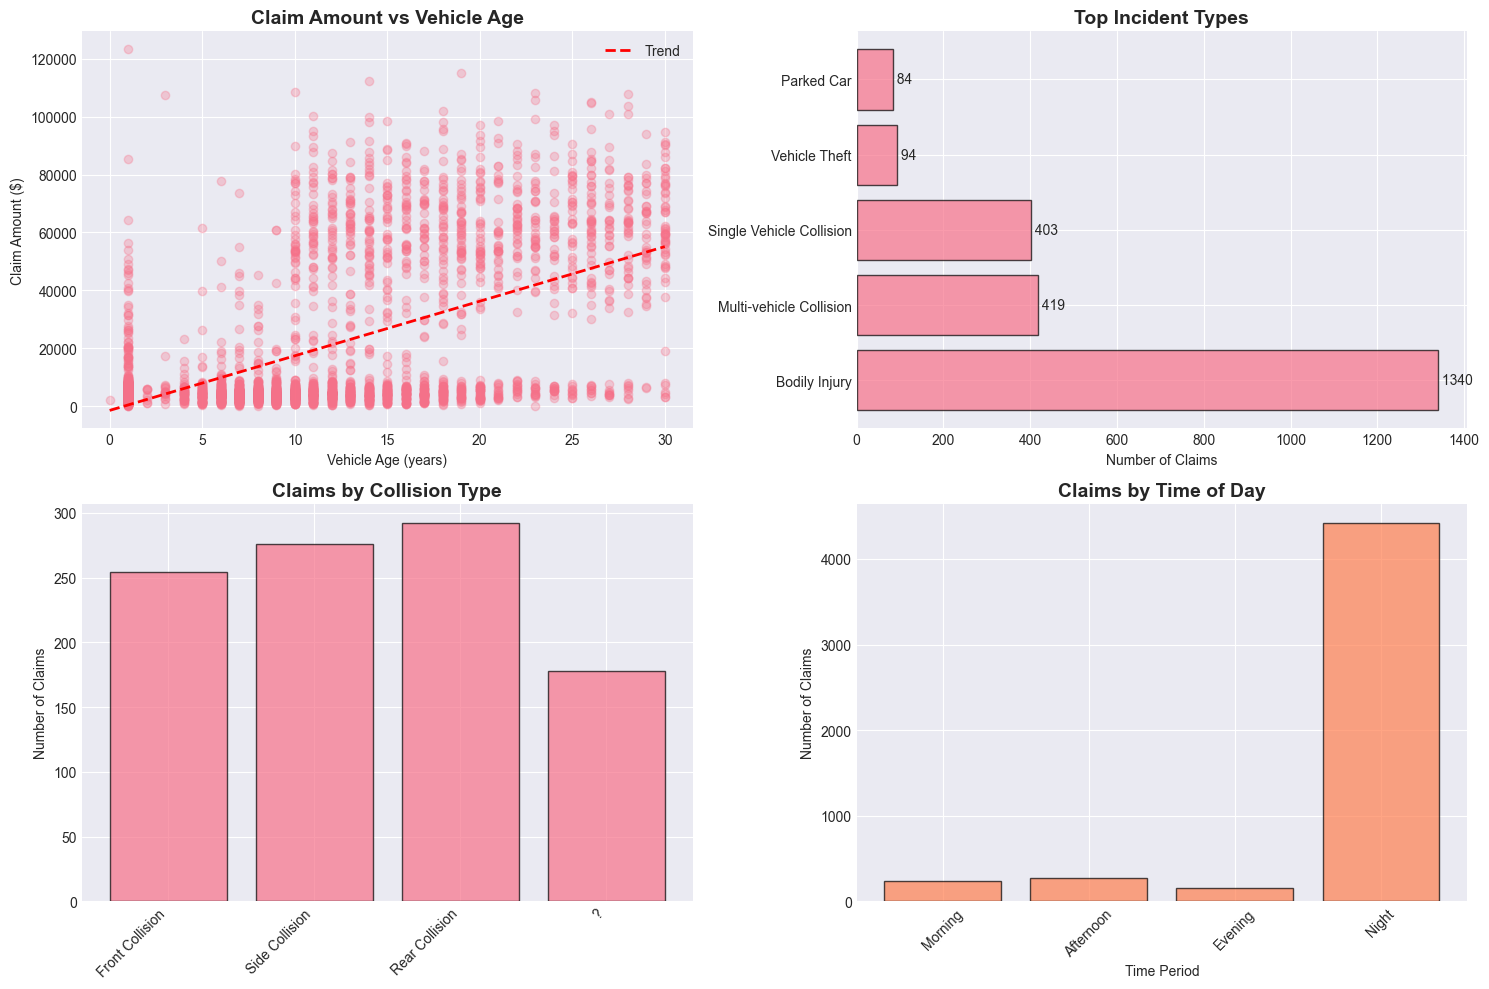

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Vehicle age impact
vehicle_age_data = df[df['vehicle_age'].notna()]
axes[0, 0].scatter(vehicle_age_data['vehicle_age'], 
                   vehicle_age_data['total_claim_amount'],
                   alpha=0.3)
axes[0, 0].set_title('Claim Amount vs Vehicle Age', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Vehicle Age (years)')
axes[0, 0].set_ylabel('Claim Amount ($)')

# Add trendline
z = np.polyfit(vehicle_age_data['vehicle_age'], vehicle_age_data['total_claim_amount'], 1)
p = np.poly1d(z)
axes[0, 0].plot(vehicle_age_data['vehicle_age'].sort_values(), 
                p(vehicle_age_data['vehicle_age'].sort_values()), 
                "r--", linewidth=2, label='Trend')
axes[0, 0].legend()

# 2. Incident type distribution
incident_counts = df['incident_type'].value_counts().head(8)
axes[0, 1].barh(incident_counts.index, incident_counts.values, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Top Incident Types', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Claims')
for i, v in enumerate(incident_counts.values):
    axes[0, 1].text(v, i, f' {v}', va='center')

# 3. Collision type analysis
collision_avg = df.groupby('collision_type')['total_claim_amount'].agg(['count', 'mean']).dropna()
collision_avg = collision_avg.sort_values('mean', ascending=False).head(6)

x = np.arange(len(collision_avg))
axes[1, 0].bar(x, collision_avg['count'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Claims by Collision Type', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Number of Claims')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(collision_avg.index, rotation=45, ha='right')

# 4. Time of day analysis
time_data = df.groupby('time_of_day')['total_claim_amount'].agg(['count', 'mean']).dropna()
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_data = time_data.reindex(time_order)

axes[1, 1].bar(time_data.index, time_data['count'], alpha=0.7, edgecolor='black', color='coral')
axes[1, 1].set_title('Claims by Time of Day', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Claims')
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('vehicle_incident_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Data Quality Comparison

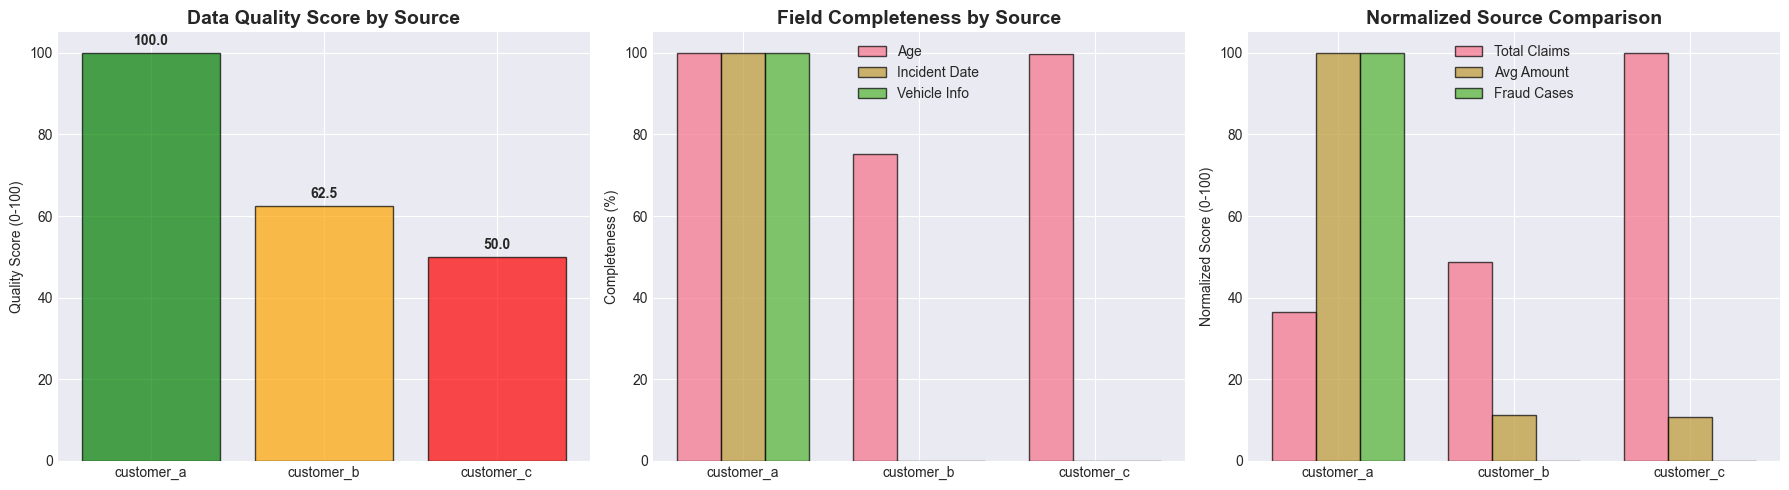


📊 Source System Summary:
source_system  total_claims  avg_claim_amount  avg_data_quality_score
   customer_a          1000          52761.94                  100.00
   customer_b          1340           5953.46                   62.51
   customer_c          2746           5669.73                   49.98


In [7]:
# Load summary table
summary_query = """
SELECT * FROM insurance_staging_analytics.mart_claims_summary
WHERE source_system != 'ALL_SOURCES'
ORDER BY source_system
"""

conn = psycopg.connect(**DB_CONFIG)
summary_df = pd.read_sql_query(summary_query, conn)
conn.close()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Data quality scores
axes[0].bar(summary_df['source_system'], summary_df['avg_data_quality_score'], 
            edgecolor='black', alpha=0.7, color=['green', 'orange', 'red'])
axes[0].set_title('Data Quality Score by Source', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Quality Score (0-100)')
axes[0].set_ylim(0, 105)
for i, v in enumerate(summary_df['avg_data_quality_score']):
    axes[0].text(i, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

# 2. Field completeness
completeness_fields = ['pct_has_age', 'pct_has_incident_date', 'pct_has_vehicle_info']
x = np.arange(len(summary_df))
width = 0.25

for i, field in enumerate(completeness_fields):
    axes[1].bar(x + i*width, summary_df[field], width, 
                label=field.replace('pct_has_', '').replace('_', ' ').title(),
                alpha=0.7, edgecolor='black')

axes[1].set_title('Field Completeness by Source', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Completeness (%)')
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(summary_df['source_system'])
axes[1].legend()
axes[1].set_ylim(0, 105)

# 3. Claims comparison
metrics = ['total_claims', 'avg_claim_amount', 'fraud_count']
x = np.arange(len(summary_df))
width = 0.25

# Normalize for comparison
norm_claims = summary_df['total_claims'] / summary_df['total_claims'].max() * 100
norm_avg = summary_df['avg_claim_amount'] / summary_df['avg_claim_amount'].max() * 100
norm_fraud = summary_df['fraud_count'].fillna(0) / summary_df['fraud_count'].max() * 100

axes[2].bar(x - width, norm_claims, width, label='Total Claims', alpha=0.7, edgecolor='black')
axes[2].bar(x, norm_avg, width, label='Avg Amount', alpha=0.7, edgecolor='black')
axes[2].bar(x + width, norm_fraud, width, label='Fraud Cases', alpha=0.7, edgecolor='black')

axes[2].set_title('Normalized Source Comparison', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Normalized Score (0-100)')
axes[2].set_xticks(x)
axes[2].set_xticklabels(summary_df['source_system'])
axes[2].legend()

plt.tight_layout()
plt.savefig('data_quality_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Source System Summary:")
print(summary_df[['source_system', 'total_claims', 'avg_claim_amount', 'avg_data_quality_score']].to_string(index=False))

## 5. Correlation Analysis

📊 Checking data completeness for numerical features...

Column Completeness:
  total_claim_amount            : 100.0%
  age                           :  93.3%
  months_as_customer            :  73.7%
  vehicle_age                   :  70.2%
  mvr_points                    :  54.0%
  prior_claim_count             :  54.0%
  injury_claim_amount           :  46.0%
  bodily_injuries_count         :  19.7%
  witnesses_count               :  19.7%
  vehicles_involved             :  19.7%
  policy_deductible             :  19.7%
  policy_annual_premium         :  19.7%
  incident_hour                 :  19.7%
  property_claim_amount         :  19.7%
  vehicle_claim_amount          :  19.7%

✓ Using 2 columns with ≥80% completeness for correlation



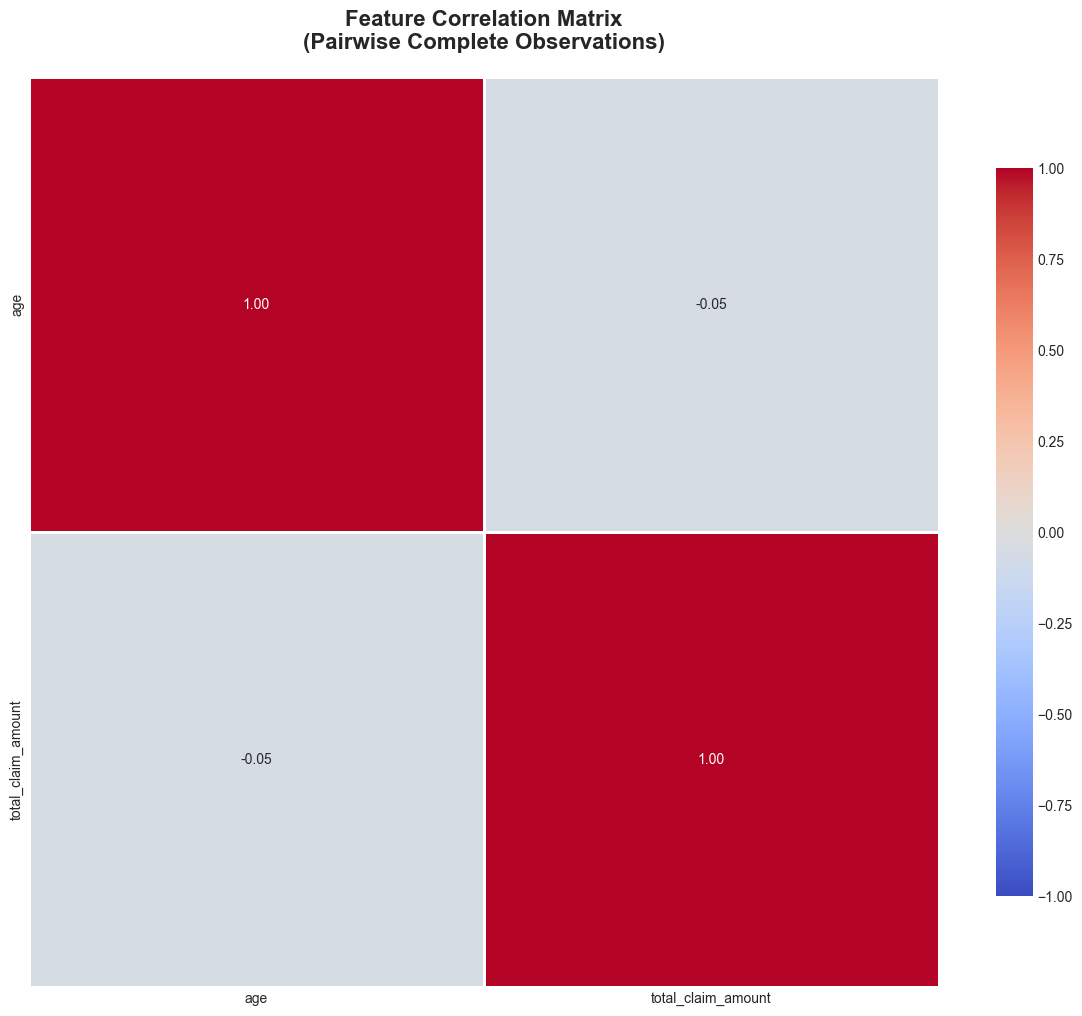


🔍 Strongest Correlations with Claim Amount:
  age                           : -0.048

ℹ️  Note: Correlation calculated using 5,086 claims with pairwise deletion for missing values


In [11]:
# Check data completeness first
print("📊 Checking data completeness for numerical features...\n")

# Candidate numerical columns
candidate_cols = [
    'age', 'vehicle_age', 'vehicles_involved', 'bodily_injuries_count',
    'witnesses_count', 'prior_claim_count', 'mvr_points', 'total_claim_amount',
    'policy_deductible', 'policy_annual_premium', 'months_as_customer',
    'incident_hour', 'injury_claim_amount', 'property_claim_amount', 
    'vehicle_claim_amount'
]

# Check which columns exist and have data
available_cols = [col for col in candidate_cols if col in df.columns]
completeness = df[available_cols].notna().sum() / len(df) * 100

print("Column Completeness:")
for col, pct in completeness.sort_values(ascending=False).items():
    print(f"  {col:30s}: {pct:5.1f}%")

# Select columns with at least 80% completeness
good_cols = completeness[completeness >= 80].index.tolist()
print(f"\n✓ Using {len(good_cols)} columns with ≥80% completeness for correlation\n")

# Calculate correlation using pairwise complete observations
correlation = df[good_cols].corr(method='pearson', min_periods=100)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
plt.title('Feature Correlation Matrix\n(Pairwise Complete Observations)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔍 Strongest Correlations with Claim Amount:")
if 'total_claim_amount' in correlation.columns:
    claim_corr = correlation['total_claim_amount'].sort_values(ascending=False)
    claim_corr = claim_corr[claim_corr.index != 'total_claim_amount']
    for feature, corr_val in claim_corr.items():
        print(f"  {feature:30s}: {corr_val:6.3f}")
else:
    print("  No correlation data available")
    
print(f"\nℹ️  Note: Correlation calculated using {len(df):,} claims with pairwise deletion for missing values")

## 6. Key Insights Summary

In [9]:
print("="*80)
print("KEY INSIGHTS FROM ANALYSIS")
print("="*80)
print()

print("📊 CLAIM DISTRIBUTION:")
print(f"  • Total Claims Analyzed: {len(df):,}")
print(f"  • Average Claim: ${df['total_claim_amount'].mean():,.2f}")
print(f"  • Median Claim: ${df['total_claim_amount'].median():,.2f}")
print(f"  • Highest Claim: ${df['total_claim_amount'].max():,.2f}")
print()

print("👥 DEMOGRAPHIC PATTERNS:")
print(f"  • Average Claimant Age: {df['age'].mean():.1f} years")
print(f"  • Gender Distribution: {(df['gender']=='M').sum()/len(df)*100:.1f}% Male")
highest_age_group = df.groupby('age_group')['total_claim_amount'].mean().idxmax()
print(f"  • Highest Avg Claims: {highest_age_group} age group")
print()

print("🚗 VEHICLE & INCIDENT INSIGHTS:")
print(f"  • Average Vehicle Age: {df['vehicle_age'].mean():.1f} years")
top_incident = df['incident_type'].value_counts().index[0] if 'incident_type' in df.columns else 'N/A'
print(f"  • Most Common Incident: {top_incident}")
weekend_pct = df['is_weekend'].mean() * 100 if 'is_weekend' in df.columns else 0
print(f"  • Weekend Incidents: {weekend_pct:.1f}%")
print()

print("📈 DATA QUALITY:")
print(f"  • Source A Quality: {summary_df[summary_df['source_system']=='customer_a']['avg_data_quality_score'].values[0]:.1f}%")
print(f"  • Source B Quality: {summary_df[summary_df['source_system']=='customer_b']['avg_data_quality_score'].values[0]:.1f}%")
print(f"  • Source C Quality: {summary_df[summary_df['source_system']=='customer_c']['avg_data_quality_score'].values[0]:.1f}%")
print()

print("🎯 RISK FACTORS:")
severe_claims = df[df['claim_severity_category'] == 'Severe']
print(f"  • Severe Claims: {len(severe_claims):,} ({len(severe_claims)/len(df)*100:.1f}%)")
if len(severe_claims) > 0:
    print(f"  • Avg Age (Severe): {severe_claims['age'].mean():.1f} years")
    print(f"  • Avg Vehicle Age (Severe): {severe_claims['vehicle_age'].mean():.1f} years")
print()

print("="*80)
print("✓ VISUALIZATION COMPLETE")
print("="*80)

KEY INSIGHTS FROM ANALYSIS

📊 CLAIM DISTRIBUTION:
  • Total Claims Analyzed: 5,086
  • Average Claim: $15,003.67
  • Median Claim: $4,298.00
  • Highest Claim: $1,067,697.00

👥 DEMOGRAPHIC PATTERNS:
  • Average Claimant Age: 40.9 years
  • Gender Distribution: 35.5% Male
  • Highest Avg Claims: 25-34 age group

🚗 VEHICLE & INCIDENT INSIGHTS:
  • Average Vehicle Age: 10.8 years
  • Most Common Incident: Bodily Injury
  • Weekend Incidents: 0.0%

📈 DATA QUALITY:
  • Source A Quality: 100.0%
  • Source B Quality: 62.5%
  • Source C Quality: 50.0%

🎯 RISK FACTORS:
  • Severe Claims: 700 (13.8%)
  • Avg Age (Severe): 39.4 years
  • Avg Vehicle Age (Severe): 19.6 years

✓ VISUALIZATION COMPLETE


## Export Summary for Documentation

In [10]:
# Create summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Claims',
        'Average Claim Amount',
        'Median Claim Amount',
        'Maximum Claim',
        'Average Claimant Age',
        'Average Vehicle Age',
        'Severe Claims (%)',
        'Weekend Incidents (%)'
    ],
    'Value': [
        f"{len(df):,}",
        f"${df['total_claim_amount'].mean():,.2f}",
        f"${df['total_claim_amount'].median():,.2f}",
        f"${df['total_claim_amount'].max():,.2f}",
        f"{df['age'].mean():.1f} years",
        f"{df['vehicle_age'].mean():.1f} years",
        f"{(df['claim_severity_category']=='Severe').sum()/len(df)*100:.1f}%",
        f"{df['is_weekend'].mean()*100:.1f}%" if 'is_weekend' in df.columns else 'N/A'
    ]
})

print("\n📋 Summary Statistics:")
print(summary_stats.to_string(index=False))

# Optionally save to CSV
# summary_stats.to_csv('analysis_summary.csv', index=False)
# print("\n✓ Summary saved to analysis_summary.csv")


📋 Summary Statistics:
               Metric         Value
         Total Claims         5,086
 Average Claim Amount    $15,003.67
  Median Claim Amount     $4,298.00
        Maximum Claim $1,067,697.00
 Average Claimant Age    40.9 years
  Average Vehicle Age    10.8 years
    Severe Claims (%)         13.8%
Weekend Incidents (%)           N/A
